# Working with Multi-Class Classification
**Fashion Mnist**



When we have more than 2 classes as an option , it's known as **mutli class classification**
* This means if you have 3 different classes , it's **multi class classification**.
* It also means if you have 100 different classes , it's also called **multi class classification**

To practice multi class classification we are going to build a neural network to classify images of different items of clothing.


### Dataset

We are goig to use the dataset(fashion mnist) from the tensorflow keras dataset website:
> https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data


> https://github.com/zalandoresearch/fashion-mnist

#### Description

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.


Here's an example of how the data looks (each class takes three-rows):

<img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png"/>


In [1]:
#  import the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

C:\tensorflow-gpu\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# The data has already been sorted into training and test data for us.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train[:10] , x_test[:10] , y_train[:10] , y_test[:10]

(array([[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,

In [4]:
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(60000, 10000, 60000, 10000)

In [5]:
# shape of the data
x_train[0].shape, y_train[0].shape

((28, 28), ())

In [6]:
# create a small list for labels
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

'Pullover'

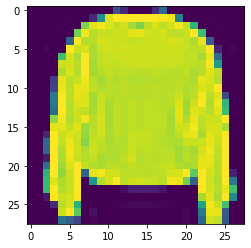

In [7]:
# visualize the simple sample
plt.imshow(x_train[7])
class_names[y_train[7]]

'Ankle boot'

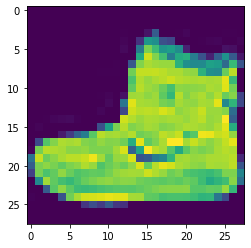

In [8]:
plt.imshow(x_train[0])
class_names[y_train[0]]

In [9]:
# Let's create a function which takes indix and returns picture and name of that picture
def show_image_and_label(i):
    plt.imshow(x_train[i], cmap=plt.cm.binary) # convert into grayscale cmap
    plt.title(class_names[y_train[i]])
    plt.axis(False)
    plt.show()
    
    

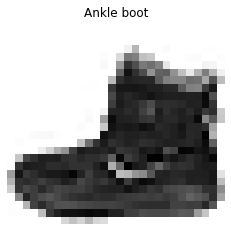

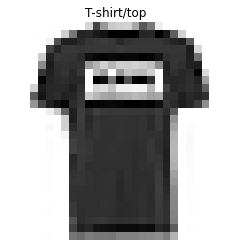

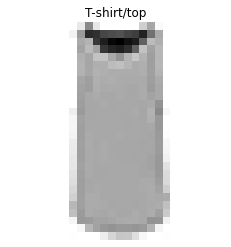

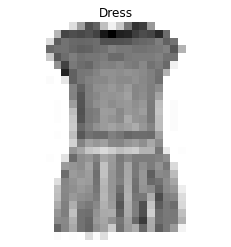

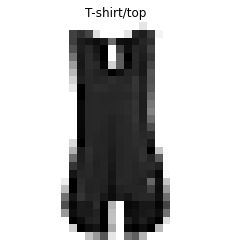

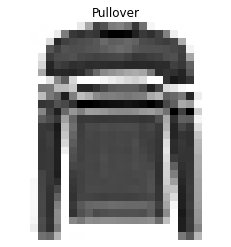

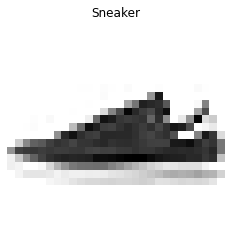

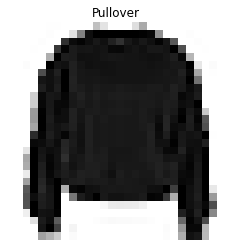

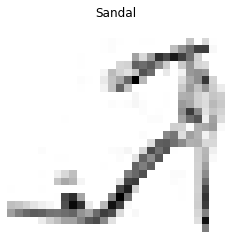

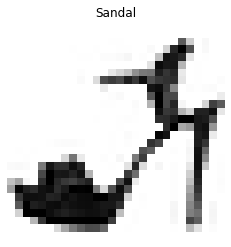

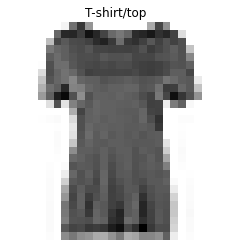

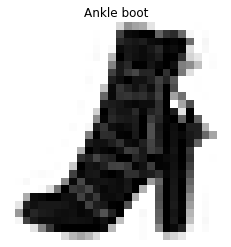

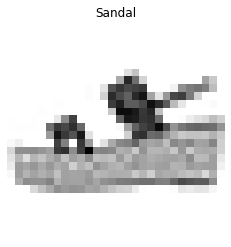

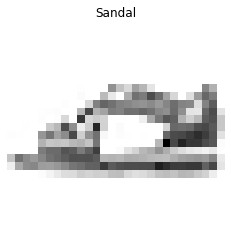

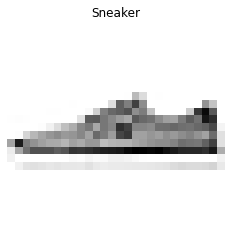

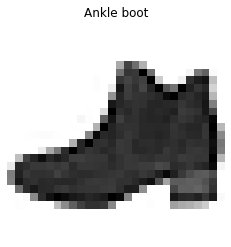

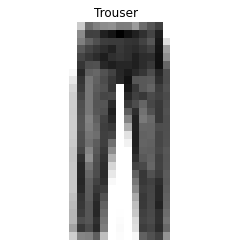

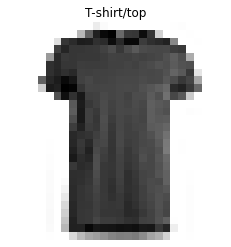

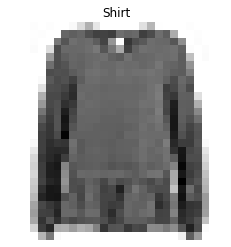

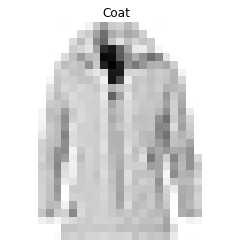

In [10]:
for i in range(20):
    show_image_and_label(i)

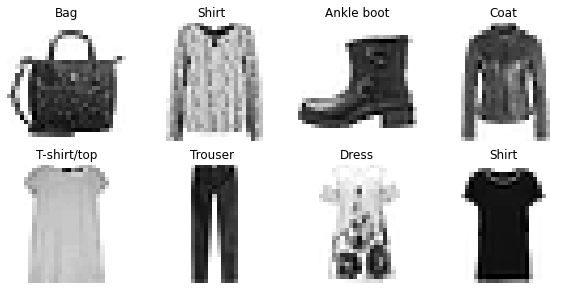

In [11]:
# create a subplot of it
import random
plt.figure(figsize=(10,10))
for i in range(8):
    ax = plt.subplot(4,4,i+1)
    rand_index = random.choice(range(len(x_train)))
    plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_index]])
    plt.axis(False)

### Building a MultiClass classification model

For our multiclass classification model we can use a similar architecture to our binary classifiers ,however we're going to change change few things:

1. Input shape : 28 x 28 ( shape of one image)
2. Output Shape: 10 ( 1 per class) so we have total of 10 classes (class_names)
3. Loss Function : tf.keras.losses.CategoricalCrossentropy()
    * If labels are one hot encoded use CategoricalCrossentropy()
    * If labels are not in one hot encoded use SparseCategoricalCrossentropy()
4. Output layer activation : Softmax ( not sigmoid)


In [12]:
# what is Faltten?
flattened_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flattened_model.output_shape

(None, 784)

In [13]:
28 * 28

784

In [14]:
tf.one_hot(y_train[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

**Note: Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss.**

In [15]:
# set random seed
tf.random.set_seed(42)

# create a model
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile a model

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fit a model
non_norm_history = model_1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.1617 - accuracy: 0.1629 - val_loss: 1.7768 - val_accuracy: 0.2080
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6970 - accuracy: 0.2565 - val_loss: 1.6411 - val_accuracy: 0.2921
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6240 - accuracy: 0.2938 - val_loss: 1.6277 - val_accuracy: 0.2911
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5658 - accuracy: 0.3229 - val_loss: 1.5253 - val_accuracy: 0.3448
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5262 - accuracy: 0.3498 - val_loss: 1.5001 - val_accuracy: 0.3564
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5034 - accuracy: 0.3613 - val_loss: 1.4504 - val_accuracy: 0.3895
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3869 - accuracy: 0.4210 - val_loss: 1.3559 - val_accuracy:

In [16]:
# or we can also change the data into binary by using one_hot() and use the CategoricalCrossentropy loss function
# set random seed
tf.random.set_seed(42)

# create a model
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile a model

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fit a model
non_norm_history = model_1.fit(x_train,
                               tf.one_hot(y_train,depth=10),
                               epochs=10,
                               validation_data=(x_test,tf.one_hot(y_test,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1709 - accuracy: 0.1610 - val_loss: 1.7887 - val_accuracy: 0.2102
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7026 - accuracy: 0.2525 - val_loss: 1.6507 - val_accuracy: 0.2867
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6287 - accuracy: 0.2835 - val_loss: 1.6074 - val_accuracy: 0.2862
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2912 - val_loss: 1.5994 - val_accuracy: 0.3066
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5860 - accuracy: 0.3050 - val_loss: 1.5598 - val_accuracy: 0.3207
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5690 - accuracy: 0.3118 - val_loss: 1.6182 - val_accuracy: 0.3203
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5350 - accuracy: 0.3394 - val_loss: 1.5149 - val_accuracy:

In [17]:
# check the model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [18]:
# check the min and max value in the training data
x_train.max(), x_train.min()

(255, 0)

### Neural Networks tend to prefer scaled(normalized) data

This means they like to have numbers in the tensors they try to find patterns between 0 and 1

In [19]:
# we can get train and test data by dividing the maximumn  value
x_train_norm = x_train / x_train.max()
x_test_norm = x_test / x_test.max()

In [20]:
x_train_norm.max(),x_train_norm.min(),x_test_norm.max(),x_test_norm.min()

(1.0, 0.0, 1.0, 0.0)

### let's train the model by using normalized data

In [22]:
# set random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# fit the model
norm_history = model_2.fit(x_train_norm,
           y_train,
           epochs=10,
           validation_data=(x_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### let's visualize the data (history)

<AxesSubplot:title={'center':'Normalized Data'}>

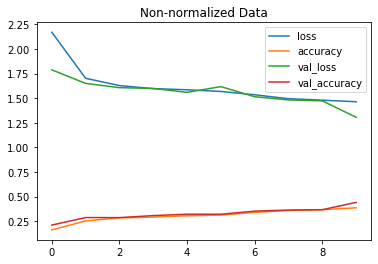

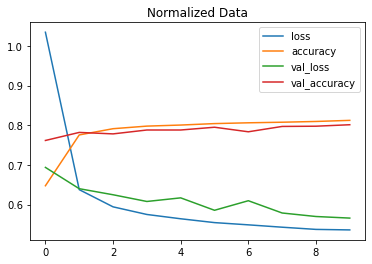

In [23]:
# non normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

#### 🔑Note : The same model even with slightly different data can produce dramatically different results.

## Find the ideal Learning rate

In [27]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


# create the callback for ideal learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
norm_lr_history = model_3.fit(x_train_norm,
           y_train,
           epochs=40,
           validation_data=(x_test_norm,y_test),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

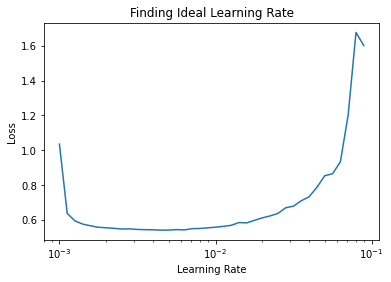

In [28]:
# plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, norm_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [30]:
10**-3

# which is a default for the Adam

0.001

### let's again fit the model by using the ideal learning rate(0.001)


In [32]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# fit the model
ideal_lr_history = model_4.fit(x_train_norm,
                              y_train,
                              epochs=20,
                              validation_data=(x_test_norm,y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluation on mutlicalss classification

To evaluate our multi class classification model we could do:
* Evaluate it's peformance using other classification metrices (such as confusion matrix)
* Access some of its predictions ( through visualization )
* Improve its results ( by training it for longer or changing the architecture)
* Save and export it for use in an application

#### Create confusion matrix

In [65]:
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix

In [66]:
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [59]:
# let's make some predictions
y_probs = model_4.predict(x_test_norm)
y_probs[:10]

313/313 [==============================] - 1s 2ms/step


array([[8.56301141e-11, 3.53616171e-13, 2.66337956e-05, 4.63560994e-08,
        5.09496422e-05, 9.61193517e-02, 8.17781753e-08, 9.18690786e-02,
        4.06052638e-03, 8.07873368e-01],
       [3.42785552e-06, 1.28992159e-16, 9.59891498e-01, 2.05162564e-07,
        1.53291877e-02, 2.45325759e-13, 2.41428670e-02, 1.13837951e-28,
        6.32721058e-04, 4.47898998e-08],
       [6.10627758e-05, 9.96576846e-01, 4.38670682e-08, 3.34057258e-03,
        1.32494997e-05, 1.43831623e-21, 8.27903750e-06, 7.32363546e-18,
        5.48115047e-08, 4.92245879e-14],
       [7.50315085e-05, 9.90536988e-01, 4.25287766e-07, 9.22316499e-03,
        1.36231829e-04, 1.82760221e-18, 2.68083204e-05, 4.81233705e-14,
        1.45215643e-06, 2.22111236e-11],
       [7.21899271e-02, 1.54956467e-06, 2.55669206e-01, 1.03631141e-02,
        4.35412675e-02, 1.10693857e-13, 6.16930068e-01, 6.75436275e-23,
        1.30491599e-03, 1.21403576e-09],
       [7.30093010e-03, 9.60110366e-01, 7.54837311e-06, 3.13695632e-02,
   

In [60]:
# let's look into the values
y_probs[0] , class_names[tf.argmax(y_probs[0])]

(array([8.5630114e-11, 3.5361617e-13, 2.6633796e-05, 4.6356099e-08,
        5.0949642e-05, 9.6119352e-02, 8.1778175e-08, 9.1869079e-02,
        4.0605264e-03, 8.0787337e-01], dtype=float32),
 'Ankle boot')

In [61]:
# convert y_probs(predicition probabilities) to the normal values
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [62]:
cm = confusion_matrix(y_test, y_preds)

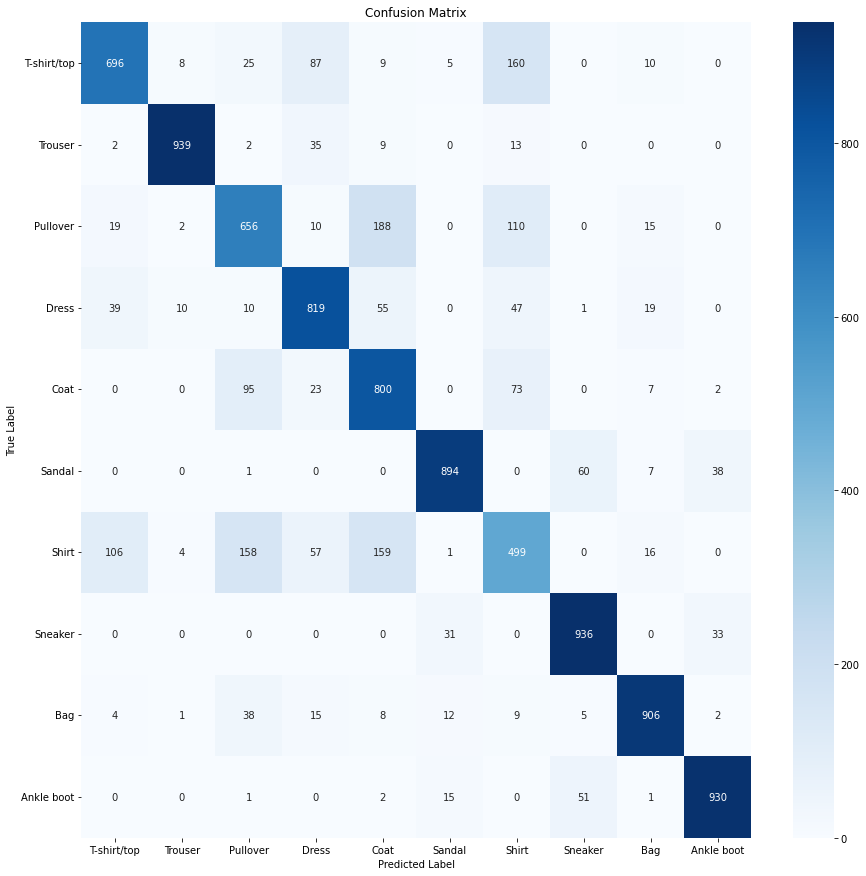

In [92]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,cmap="Blues",fmt='g',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix");
plt.yticks(rotation="horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

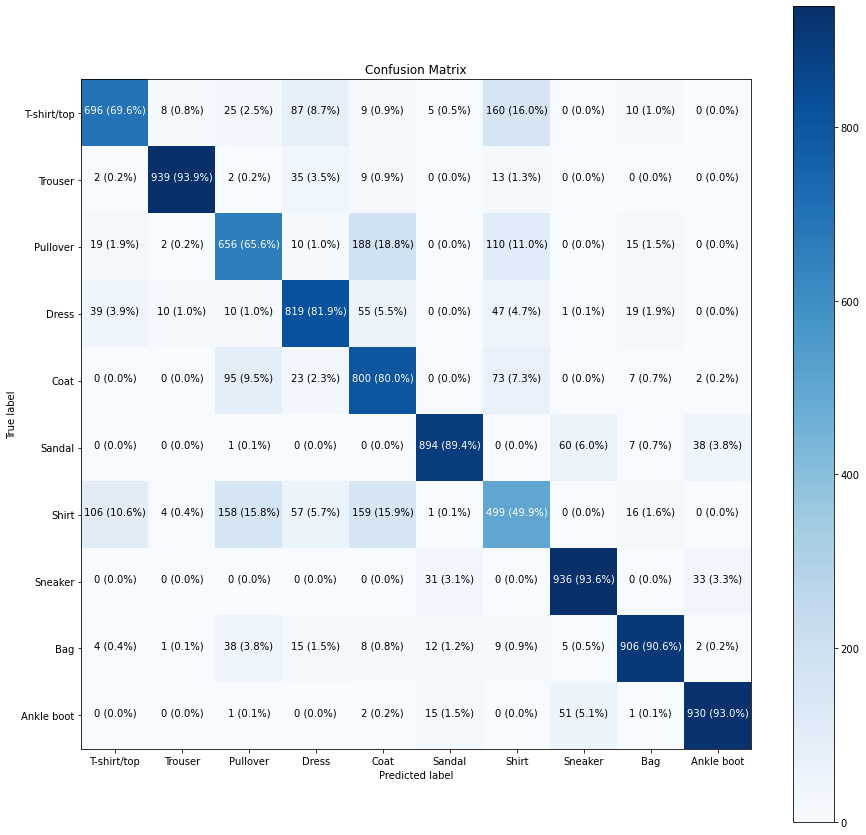

In [70]:
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=class_names,
                     figsize=(15,15),
                     text_size=10)

# let's visualize the predictions

BY creating the function



In [187]:
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image and plot with predicted and true label
    """
    # set random images
    color=None
    i = random.randint(0, len(images))
    
    # create predicition and target image
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    
    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # change the color of the title depending if the predicition is right or not
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/ true label)
    plt.title("Pred: {} {:2.0f}% True :{}".format(pred_label,
                                          100*tf.reduce_max(pred_probs),
                                          true_label,),
              color=color)  # set the color to green or red based on the predictions
    

1/1 [==============================] - 0s 24ms/step


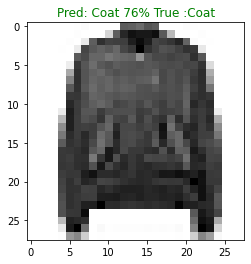

In [225]:
plot_random_image(model=model_4,
                 images=x_test_norm, # always make predictions on the same kind of data your model was trained on
                 true_labels=y_test,
                 classes=class_names)

# What patterns is our model learning?

In [226]:
model_4.layers

In [227]:
# Extract a particular layer
model_4.layers[1]

In [228]:
# get the patterns of a layer in a network
weights , biases = model_4.layers[1].get_weights()

In [229]:
# weights and shapes of weights
weights, weights.shape

(array([[ 0.7150266 , -0.06077102, -0.99763083, -1.0484312 ],
        [ 0.27732125, -0.47155473, -0.52916443,  0.02329273],
        [ 0.7752432 ,  0.54027575, -1.1288565 , -0.74261534],
        ...,
        [-0.39453354,  0.47628668, -0.2264158 ,  0.2550596 ],
        [-0.4051575 ,  0.61810064,  0.23928408, -0.50387603],
        [ 0.23884591,  0.11606897, -0.12131351,  0.04352419]],
       dtype=float32),
 (784, 4))

In [230]:
28 * 28

784

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the `kernel_initializer` parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

#### bias vector

In [232]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4485901e-02, -6.1496050e-04, -2.7230194e-01,  8.1124961e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the `bias_initializer` parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [233]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility `plot_model()`.

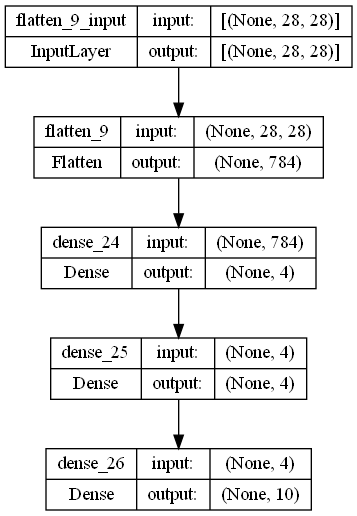

In [235]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)

# How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.